# Задание 03 
## Конфигурационная модель

In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
import networkx as nx

import warnings
warnings.filterwarnings('ignore')

Конфигурационная модель - генератор случайной сети с заданным распределением степеней вершин. Алгоритм заключается в следующих шагах: 
* каждой  вершине $i$ графа  присваивается $k_i$ «полуребер»;
* из   последовательности таких «полуребер» случайным образом выбирается пара и соответствующие вершины $i$ и $j$ соединяются ребром; 
* предыдущий  шаг  повторяется  до  тех пор,  все ребра не будут задействованы.
![](config01.png)


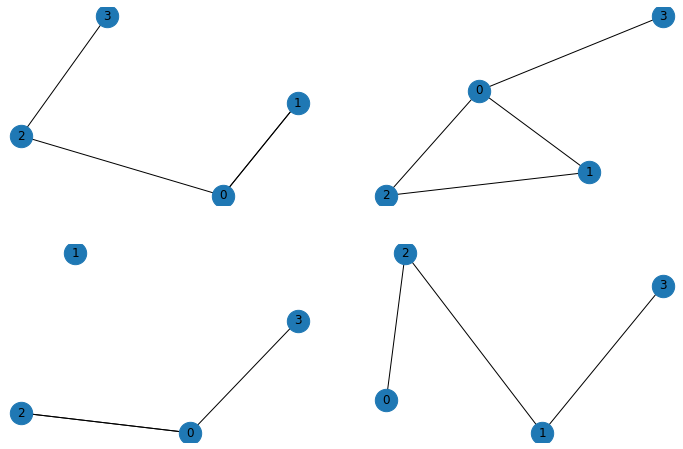

In [2]:
degrees=[3,2,2,1]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))

plt.subplot(221)
G=nx.configuration_model(degrees,seed=5)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)

plt.subplot(222)
G=nx.configuration_model(degrees,seed=10)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)

plt.subplot(223)
G=nx.configuration_model(degrees,seed=28)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)

plt.subplot(224)
G=nx.configuration_model(degrees,seed=115)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)


In [3]:
print(list(G.edges()))
print(list(nx.selfloop_edges(G))) #все петли

[(0, 0), (0, 2), (1, 3), (1, 2)]
[(0, 0)]


### Топология конфигурационной сети:
Ожидаемое число мультиребер:
$$
M=\frac{1}{2} \left(\frac{\langle k^2\rangle-\langle k\rangle}{\langle k\rangle}\right)^2,
$$
Ожидаемое число петель: 
$$
S=\frac{\langle k^2\rangle-\langle k\rangle}{2\langle k\rangle},
$$

Коэффициент кластеризации: 

$$
C=\frac{1}{N} \frac{(\langle k^2\rangle-\langle k\rangle)^2}{\langle k\rangle^3},
$$


#### Задача 1.  Конфигурационная модель сетей со степенным распределением
* напишите функции, вычисляющие по заданному массиву степеней теоретические (ожидаемые) значения числа мультиребер, петель и коэффициент кластеризации;

In [4]:
def teor_edges(degrees):
    return 1 / 2 * ((np.mean(np.array(degrees)**2) - np.mean(np.array(degrees))) / np.mean(np.array(degrees))) ** 2

def teor_loops(degrees):
    return (np.mean(np.array(degrees)**2) - np.mean(np.array(degrees))) / (2 * np.mean(np.array(degrees)))

def teor_clustering(degrees):
    return 1 / len(degrees) * (np.mean(np.array(degrees)**2) - np.mean(np.array(degrees))) ** 2 / np.mean(np.array(degrees)) ** 3

* напишите функции, вычисляющие число мультиребер, число петель и средний коэффициент кластеризации для заданного мультиграфа; 

In [5]:
def num_edges(G):
    A = nx.adjacency_matrix(G)
    A.setdiag(0)
    return np.sum(A[A > 1]) / 2

def num_loops(G):
    return nx.number_of_selfloops(G)

def num_clustering(G):
    G_weigh = nx.Graph()
    for u,v,data in G.edges(data=True):
        w = data['weight'] if 'weight' in data else 1.0
        if G_weigh.has_edge(u,v)==True:
            G_weigh[u][v]['weight'] += w
        else:
            G_weigh.add_edge(u, v, weight=w)
    return nx.average_clustering(G_weigh)

* сгенерируйте значения степеней вершин из степенного распределения для различных значений $\gamma \in \left[2.0, 3.0\right]$. Для этих распределений выведите теоретические (ожидаемые) значения числа мультиребер M, петель S и коэффициента кластеризации C, постройте по заданному массиву степеней конфигурационную модель, вычислите наблюдаемые для полученного графа значения M,S,C. Объясните полученные результаты.

Для генерации массива степеней воспользуйтесь функцией (используется [метод обратного преобразования](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F)):

In [6]:
def power_law(gamma,x_min=2,size=1000): #size - размер массива
    x=np.zeros(size,dtype=int)
    for i in range(size):
        r=np.random.random()
        x[i]=int(x_min*np.float_power((r),1/(-gamma+1)))
    return x

In [7]:
print(power_law(2,size=4))

[2 9 6 2]


тк порой генерируется нечетная сумма степеней, то добавим проверку

In [8]:
def check(gamma,x_min=2,size=1000):
    degres = power_law(gamma, x_min, size)
    s = sum(degres)
    while s % 2 != 0:
        degres = power_law(gamma, x_min, size)
        s = sum(degres)
    return degres

In [9]:
print(check(2,size=4))

[17  2  5  8]


In [19]:
gamma = np.linspace(2.0, 3.0, num = 3)
for i in gamma:
  d = check(i,size=10)
  G = nx.configuration_model(d,seed=900)
  print('\n', d)
  print('M teor:', teor_edges(d))
  print('M actual:', num_edges(G))
  print('S teor:', teor_loops(d))
  print('S actual:', num_loops(G))
  print('C teor:', teor_clustering(d))
  print('C actual:', num_clustering(G))


 [122   2   2  30   2   2   3   6  21   4]
M teor: 3447.06748857477
M actual: 52.0
S teor: 41.51546391752578
S actual: 40
C teor: 35.53677823272958
C actual: 0.4876190476190477

 [ 2  2 41  2  3  7  2  9  2 20]
M teor: 285.3395061728395
M actual: 27.0
S teor: 11.944444444444445
S actual: 9
C teor: 6.340877914951989
C actual: 0.48119047619047617

 [2 3 8 2 3 2 5 2 2 3]
M teor: 5.281249999999998
M actual: 6.0
S teor: 1.6249999999999998
S actual: 1
C teor: 0.33007812499999983
C actual: 0.1733333333333333


#### Задание 2. Распределение степеней ближайших соседей
 * Пусть $\gamma=3$, сгенерируйте массив степеней из степенного распределения, постройте несколько конфигурационных моделей для полученного массива;
 * для каждой вершины определите степени её ближайших соседей, объедините все значения в один массив и постройте распределение степеней. Определите среднее и дисперсию, отличаются ли они от среднего значения степени  вршин в сети и дисперсии? Объясните результаты. 

In [11]:
n = 10
d = check(gamma=3,size=10)
G_2 = [nx.configuration_model(d,seed=117 + i) for i in range(n)]
nearest_neighbors = np.array([np.mean([np.mean([G_2[j].degree[q] for q in list(G_2[j].neighbors(i))]) for j in range(n)]) for i in range(10)])
m = np.mean(nearest_neighbors)
v = np.mean(nearest_neighbors ** 2) - m ** 2
print('nearest neighbors degree:', nearest_neighbors)
print('mean:', m)
print('variance:', v)

nearest neighbors degree: [4.01833333 4.23333333 4.55       4.2        4.6        4.285
 4.22166667 3.87166667 4.         4.2       ]
mean: 4.218
variance: 0.046887111111111324


#### Задача 2. Конфигурационная модель сложной сети 
* постройте конфигурационную модель сети заболеваний;
* сравните топологические характеристики сложной сети и ее конфигурационной модели: коэффициент кластеризации, транзитивность, средний кратчайший путь.

In [12]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bio-diseasome.txt to bio-diseasome (4).txt
User uploaded file "bio-diseasome.txt" with length 8978 bytes


In [23]:
G=nx.read_edgelist('bio-diseasome.txt')



---


Сложная сеть

---



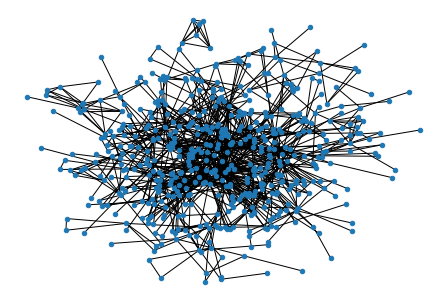

In [24]:
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=20,with_labels=False)

In [26]:
print('transitivity:', nx.transitivity(G))
print('S:', nx.number_of_selfloops(G))
print('C:', num_clustering(G))

qwe = []
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
  qwe.append(nx.average_shortest_path_length(C))
print('average shortest path:', np.mean(qwe))

transitivity: 0.4304705634100021
S: 0
C: 0.6358304997771196
average shortest path: 6.5089937532926925



---


Конфигурационная модель

---



Конфигурационная модель


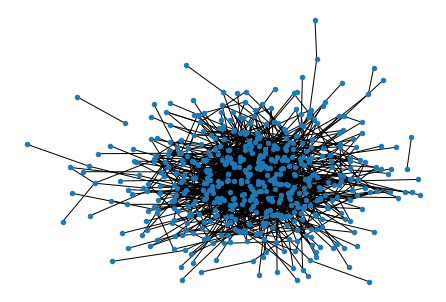

In [16]:
d_2 = np.array(list(dict(G.degree).values()))
G_conf_2 = nx.configuration_model(d_2,seed=100)
nx.draw(G_conf_2,nx.spring_layout(G_conf_2,iterations=10),node_size=20,with_labels=False)
print('Конфигурационная модель')

In [17]:
def transitivity(G):
    G_w = nx.Graph()
    for u,v,data in G.edges(data=True):
        w = data['weight'] if 'weight' in data else 1.0
        if G_w.has_edge(u,v):
            G_w[u][v]['weight'] += w
        else:
            G_w.add_edge(u, v, weight=w)
    return nx.transitivity(G_w)

In [28]:
print('transitivity:', transitivity(G_conf_2))
print('S:', nx.number_of_selfloops(G_conf_2))
print('C:', num_clustering(G_conf_2))

qwer = []
for C in (G_conf_2.subgraph(c).copy() for c in nx.connected_components(G_conf_2)):
  qwer.append(nx.average_shortest_path_length(C))
print('average shortest path:', np.mean(qwer))

transitivity: 0.020826102047900034
S: 4
C: 0.024607517195630892
average shortest path: 1.7312666127354674
